In [43]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [44]:
# Number of neurons in each layer
NEURONS = [ 2, 3, 1 ]

# Initial weights (Including Bias)
W1  = np.random.uniform( -.1, .1, size=( NEURONS[0]+1, NEURONS[1] ) ).T
W2  = np.random.uniform( -.1, .1, size=( NEURONS[1]+1, NEURONS[2] ) ).T

# input the dataset
TRAIN_X1 = [ 4, 4, 5, 5, 7,      1,  2,  3,  6,  3,  6,  4,  7 ]
TRAIN_X2 = [ 2, 4, 3, 1, 2,      2,  1,  1,  5,  6,  7,  6,  6 ]
TRAIN_Z  = [ 1, 1, 1, 1, 1,     -1, -1, -1, -1, -1, -1, -1, -1 ]
TRAIN_N  = len(TRAIN_X1)
TRAIN_X0 = np.ones(TRAIN_N)

TEST_X1 = [ 4, 5, 3, 5, 6, 7,    3,  8,  4,  7,  2,  2 ]
TEST_X2 = [ 1, 2, 4, 4, 1, 1,    2,  7,  7,  5,  3,  5 ]
TEST_Z  = [ 1, 1, 1, 1, 1, 1,   -1, -1, -1, -1, -1, -1 ]
TEST_N  = len(TEST_X1)
TEST_X0 = np.ones(TEST_N)

TRAIN_X  = np.array( [TRAIN_X0, TRAIN_X1, TRAIN_X2] ).T

TRAIN_H  = np.ones([ TRAIN_N, NEURONS[1]+1 ])
TRAIN_Y  = np.empty(TRAIN_N)

TRAIN_delta_1 = np.empty([ TRAIN_N, NEURONS[0]+1 ] )
TRAIN_delta_2 = np.empty([ TRAIN_N, NEURONS[2] ] )

In [45]:
def plot_sep_line(w, n):
    
    domain = np.linspace(0,n)
    image  = list( map( lambda x : -(w[1]*x + w[0])/w[2] , domain ) )
    plt.plot(domain, image, color='purple')
    
def plot_result(w,h,n,X1,X2,line=False):
    if line: plot_sep_line(w, n)
    _ = plt.scatter(x=X1[:h], y=X2[:h], color='b')
    _ = plt.scatter(x=X1[h:], y=X2[h:], color='r')

## a)

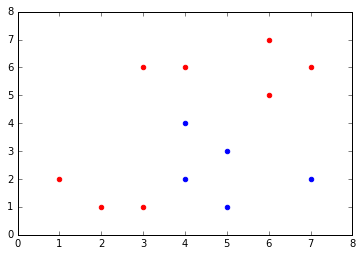

In [46]:
plot_result(W1[0], 5, TRAIN_N, TRAIN_X1, TRAIN_X2)

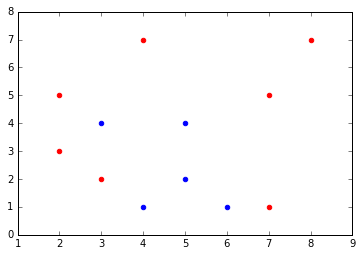

In [47]:
plot_result(W1[0], 5, TEST_N, TEST_X1, TEST_X2)

In [48]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
    return 2*1/(1+np.exp(-x)) - 1

def sigmoid_deriv(x):  # Might be wrong
    return x*(1-x)

def step(x):
    return np.where( x > 0, 1, -1 )

def linear (x):
    return x

# Pass the activation Function
# Options: linear, step, sigmoid
activate = linear

$ net_i^l = \sum_{j=0}^{j=L} w_{i,j} x_j $, with $x_0=1$ and $w_{i,0}=b_i$

In [49]:
ETA = 1/10

def net(w, x):
    return w.dot( x )

CPU times: user 689 ms, sys: 6.88 ms, total: 696 ms
Wall time: 770 ms


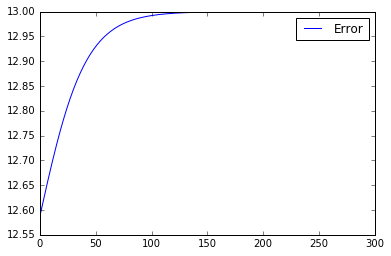

In [38]:
%%time

# Initial weights (Including Bias)
W1  = np.random.uniform( -.1, .1, size=( NEURONS[0]+1, NEURONS[1] ) ).T
W2  = np.random.uniform( -.1, .1, size=( NEURONS[1]+1, NEURONS[2] ) ).T

W1_initial = W1
W2_initial = W2

M = 300
errors = []

for i in range(0,M):
    total_error = 0
    update_avg_2 = np.zeros( NEURONS[1]+1 )
    update_avg_1 = np.zeros( [ NEURONS[1], NEURONS[0]+1 ]  )  # 3x3
    
    # First layer
    for s in range(0, TRAIN_N):
        TRAIN_H[ s, 1: ] = sigmoid( net(W1, TRAIN_X[s]) )

    # Second layer
    for s in range(0, TRAIN_N):
        TRAIN_Y[s] = linear( net(W2, TRAIN_H[s]) )

    # Compute the error    
    ERR = TRAIN_Y - TRAIN_Z

    # Compute the deltas
    for s in range(0, TRAIN_N):
        TRAIN_delta_2[s]   = ERR[s] * sigmoid_deriv( net(W2, TRAIN_H[s]) )

        for i in range(0, NEURONS[0]+1):
            TRAIN_delta_1[s,i] = TRAIN_delta_2[s] * W2[0,i] * sigmoid_deriv( net(W1, TRAIN_X[s])[i] )
    
    # Gradient descend
    for s in range(0, TRAIN_N):
        update_avg_2 += ETA * TRAIN_H[s] * TRAIN_delta_2[s] / TRAIN_N
        
        for j in range(0, NEURONS[0]+1):
            # Where da f*&%$$% is the j ?
            update_avg_1[:,j] += ETA * TRAIN_X[s] * TRAIN_delta_1[s,j] / TRAIN_N
        
        total_error  += ERR[s]**2
    
    # Update the weights
    W1 -= update_avg_1
    W2 -= update_avg_2
    
    errors.append(total_error)
    if total_error == 0 : break

        
def plot_errors(errors):
    plt.plot(range(0,len(errors)), errors, label='Error' )   
    plt.legend()
    
plot_errors(errors)

<br/><br/><br/><br/>

Taking inspiration from the book [Neural Networks](https://page.mi.fu-berlin.de/rojas/neural/chapter/K7.pdf) by R. Rojas.

![Network](Network.png "Network")

### First step: feed-forward computation
The vector $o$ is presented to the network. The vectors $o^{(1)}$ and $o^{(2)}$ are computed and stored. The evaluated derivatives of the activation functions are also stored at each unit.

### Second step: backpropagation to the output layer
We are looking for the first set of partial derivatives $ \partial E/\partial w_{i,j}^{(2)} = \delta_j^{(2)} o_i^{(1)} $, where

$$ \delta_j^{(2)} = o_j^{(2)}(1 − o_j^{(2)})(o_j^{(2)} − t_j ) $$

### Third step: backpropagation to the hidden layer
￼Now we want to compute the partial derivatives $\partial E/ \partial w^{(1)}$. Each unit $j$ in the hidden layer is connected to each unit $q$ in the output layer with an edge of weight $w^{(2)}$, for $q = 1,\dots m$. The backpropagated error up to unit $j$ in
the hidden layer must be computed taking into account all possible backward paths.
The backpropagated error is then
$$ \delta_j^{(1)} = o_j^{(1)}(1 − o_j^{(1)}) \sum_{q=1}^m w_{j,q}^{(2)} \delta_q^{(2)} $$

### Fourth step: weight updates
After computing all partial derivatives the network weights are updated in the negative gradient direction. 
A learning constant $\eta$ defines the step length of the correction. 
The corrections for the weights are given by

$$ \Delta w_{i,j}^{(2)} = − \eta \, o_i^{(1)} \, \delta_j^{(2)}, \qquad i=1,\dots,k+1 \quad , \quad j=1,\dots,m $$

and

$$ \Delta w_{i,j}^{(1)} = − \eta \, o_{i} \, \delta_j^{(1)}, \qquad i=1,\dots,n+1 \quad , \quad j=1,\dots,k $$

In [ ]:
# Initial weights (Including Bias)
W1  = np.random.uniform( -.1, .1, size=( NEURONS[0]+1, NEURONS[1] ) )
W2  = np.random.uniform( -.1, .1, size=( NEURONS[1]+1, NEURONS[2] ) )

W1_initial = W1
W2_initial = W2

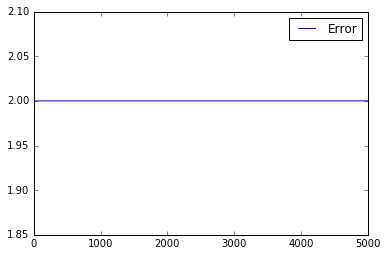

In [180]:
eta = 0.1
errors = []

W1 = W1_initial
W2 = W2_initial

n = NEURONS[0]
k = NEURONS[1]
m = NEURONS[2]

del_1   = np.empty( k )
del_2   = np.empty( m )

del_w_1 = np.empty( [ n+1, k ] )
del_w_2 = np.empty( [ k+1, m ] )

del_w_1_avg = np.zeros( [ n+1, k ] )
del_w_2_avg = np.zeros( [ k+1, m ] )


for epoch in range( 0, 5000 ):
    
    total_error = 0
    #print(epoch)
    #print(W2)
        
    for s in range( 0, TRAIN_N ):

        # First step: feed-forward computation
        O_   = TRAIN_X[s]
        net1 = np.dot( O_, W1 )

        O1   = sigmoid(net1)
        O1_  = [ 1, *O1 ]

        O2   = np.dot( O1_, W2 )


        # Second step: backpropagation to the output layer
        for j in range( 0, m ) :  # For us, j=0 only
            del_2[j] = ( O2[j] - TRAIN_Z[s] ) # * O2[j] * (1 - O2[j])

        # Third step: backpropagation to the hidden layer

        for j in range( 0, k ) :  # This should be vectorialized
            del_1[j] = O1[j] * (1 - O1[j]) * W2[j,:] * del_2


        # Fourth step: weight updates

        for i in range(k+1):
            for j in range(m):
                del_w_2[i,j] = - eta * O1_[i] * del_2[j]

        for i in range(n+1):
            for j in range(k):
                del_w_1[i,j] = - eta * O_[i] * del_1[j]

        del_w_1_avg += del_w_1 / TRAIN_N
        del_w_2_avg += del_w_2 / TRAIN_N

        total_error += 0.5 * ( step( O2 ) - TRAIN_Z[s] )**2
        
    W1 += del_w_1_avg
    W2 += del_w_2_avg

    errors.append( total_error )
    if total_error == 0 : break

    
def plot_errors(errors):
    plt.plot(range(0,len(errors)), errors, label='Error' )   
    plt.legend()
    
plot_errors(errors)

<br/><br/><br/><br/>